<a href="https://colab.research.google.com/github/abroraxatov1/dataset1/blob/main/my_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv("SoilFertility.csv")
df.head()

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Output
0,138,8.6,560,7.46,0.62,0.70,5.9,0.24,0.31,0.77,8.71,0.11,0
1,213,7.5,338,7.62,0.75,1.06,25.4,0.30,0.86,1.54,2.89,2.29,0
2,163,9.6,718,7.59,0.51,1.11,14.3,0.30,0.86,1.57,2.70,2.03,0
3,157,6.8,475,7.64,0.58,0.94,26.0,0.34,0.54,1.53,2.65,1.82,0
4,270,9.9,444,7.63,0.40,0.86,11.8,0.25,0.76,1.69,2.43,2.26,1


In [2]:
print("Null values:\n", df.isnull().sum())


Null values:
 N         0
P         0
K         0
pH        0
EC        0
OC        0
S         0
Zn        0
Fe        0
Cu        0
Mn        0
B         0
Output    0
dtype: int64


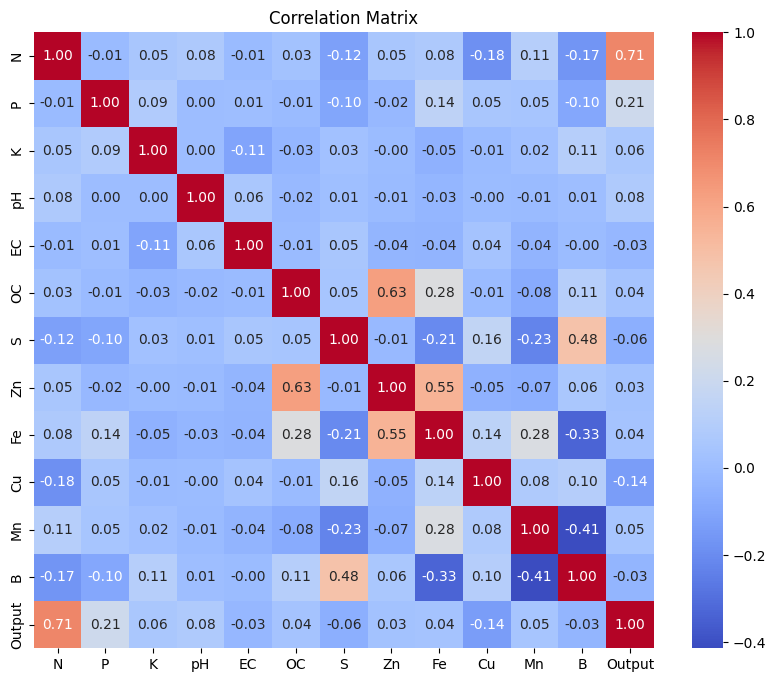

In [22]:


import matplotlib.pyplot as plt
# Calculate the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

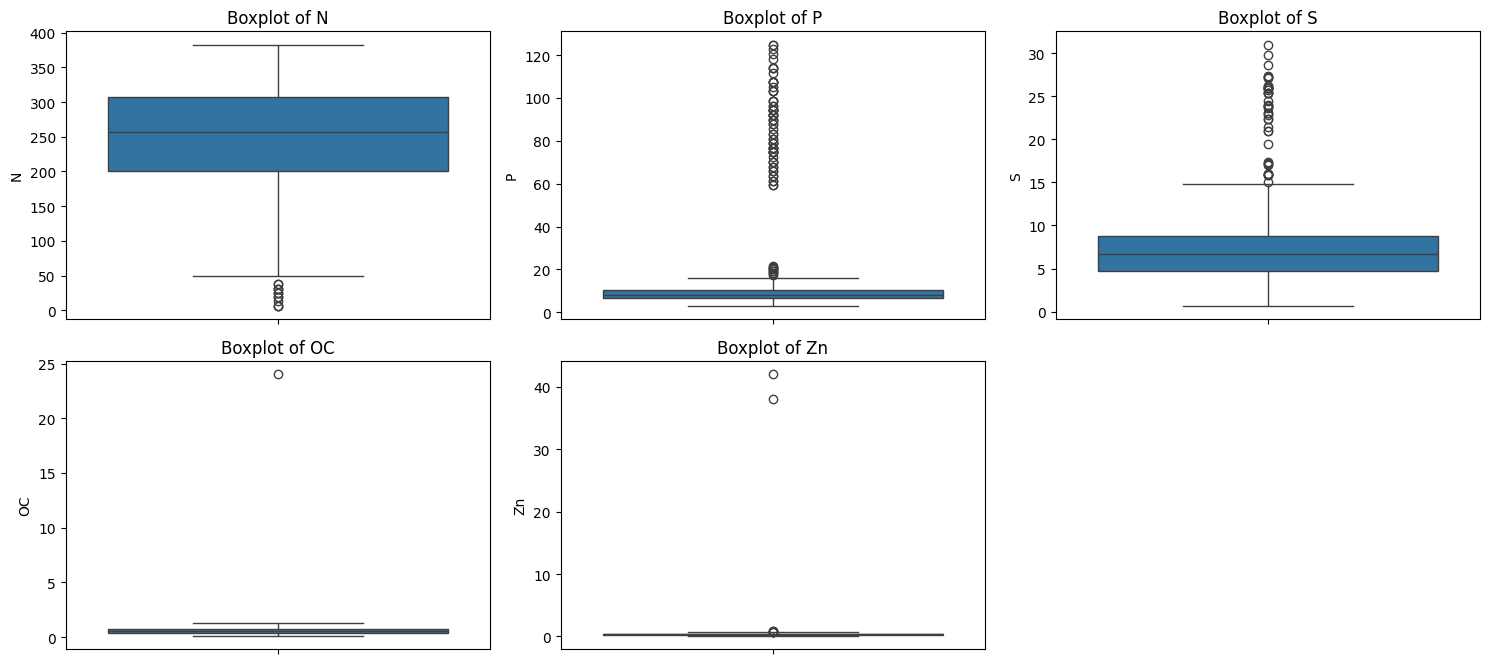

In [7]:
numerical_features = ['N', 'P', 'S', 'OC', 'Zn']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [10]:
le = LabelEncoder()
df['Output'] = le.fit_transform(df['Output'])

# Raqamlar mos keladi:
# Low -> 1, Medium -> 2, High -> 0 (le klasslar bo‘yicha alfavit tartibida kodlaydi)
print(le.classes_)  # ['High', 'Low', 'Medium']


[0 1 2]


In [11]:
X = df.drop('Output', axis=1)
y = df['Output']


In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)


Train set size: (704, 12)
Test set size: (176, 12)


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

print("Logistic Regression Report:\n", classification_report(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.92      0.85      0.88        80
           1       0.81      0.94      0.87        88
           2       0.00      0.00      0.00         8

    accuracy                           0.86       176
   macro avg       0.58      0.60      0.59       176
weighted avg       0.82      0.86      0.84       176

Confusion Matrix:
 [[68 12  0]
 [ 5 83  0]
 [ 1  7  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


KNN Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85        80
           1       0.81      0.86      0.84        88
           2       0.00      0.00      0.00         8

    accuracy                           0.82       176
   macro avg       0.55      0.58      0.56       176
weighted avg       0.79      0.82      0.80       176

Confusion Matrix:
 [[69 11  0]
 [12 76  0]
 [ 1  7  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [16]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)

print("Decision Tree Report:\n", classification_report(y_test, y_pred_dtree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dtree))


Decision Tree Report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86        80
           1       0.83      0.83      0.83        88
           2       0.33      0.50      0.40         8

    accuracy                           0.82       176
   macro avg       0.68      0.72      0.70       176
weighted avg       0.83      0.82      0.82       176

Confusion Matrix:
 [[67 13  0]
 [ 7 73  8]
 [ 2  2  4]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


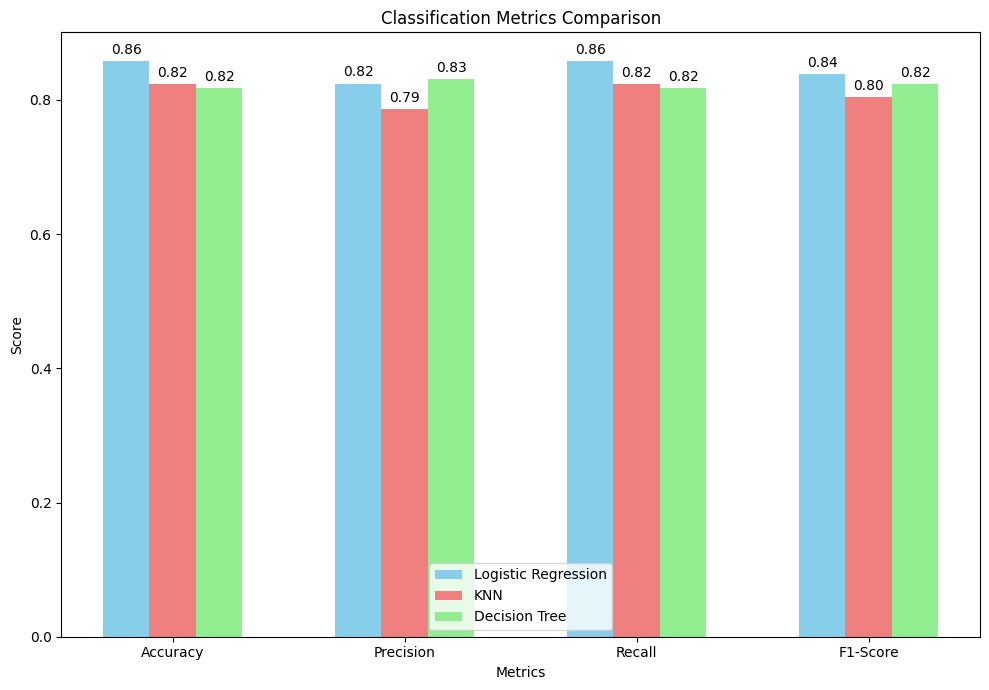

In [23]:


import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg, average='weighted')
recall_logreg = recall_score(y_test, y_pred_logreg, average='weighted')
f1_logreg = f1_score(y_test, y_pred_logreg, average='weighted')

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

accuracy_dtree = accuracy_score(y_test, y_pred_dtree)
precision_dtree = precision_score(y_test, y_pred_dtree, average='weighted')
recall_dtree = recall_score(y_test, y_pred_dtree, average='weighted')
f1_dtree = f1_score(y_test, y_pred_dtree, average='weighted')


metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
logreg_scores = [accuracy_logreg, precision_logreg, recall_logreg, f1_logreg]
knn_scores = [accuracy_knn, precision_knn, recall_knn, f1_knn]
dtree_scores = [accuracy_dtree, precision_dtree, recall_dtree, f1_dtree]

x = np.arange(len(metrics))  # Metrikalar uchun o'rnini belgilash
width = 0.2  # Ustunlarning kengligi

plt.figure(figsize=(10, 7))

# Ustunlarni chizish
plt.bar(x - width, logreg_scores, width, label='Logistic Regression', color='skyblue')
plt.bar(x, knn_scores, width, label='KNN', color='lightcoral')
plt.bar(x + width, dtree_scores, width, label='Decision Tree', color='lightgreen')

# Diagramma nomlari va yorliqlar
plt.ylabel('Score')
plt.title('Classification Metrics Comparison')
plt.xlabel('Metrics')
plt.xticks(x, metrics)
plt.legend()

# Ustunlar ustiga qiymatlarni yozish
def autolabel(rects):
  """Ustunlar ustiga qiymatlarni qo'shish"""
  for rect in rects:
    height = rect.get_height()
    plt.annotate('{:.2f}'.format(height),
                 xy=(rect.get_x() + rect.get_width() / 2, height),
                 xytext=(0, 3),  # Vertikal siljish
                 textcoords="offset points",
                 ha='center', va='bottom')

autolabel(plt.bar(x - width, logreg_scores, width, label='Logistic Regression', color='skyblue'))
autolabel(plt.bar(x, knn_scores, width, label='KNN', color='lightcoral'))
autolabel(plt.bar(x + width, dtree_scores, width, label='Decision Tree', color='lightgreen'))

plt.tight_layout()
plt.show()